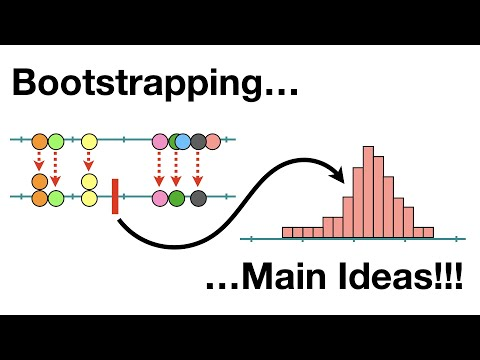

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Standard Deviation: Is how spread out the data within a dataset is. The large the deviation the more spread out the data is. 
Standard Error of the Mean: Is how much the sample mean is supposed to change if you were to take multiple trials from the same population/dataset. It shows how precise your sample mean is compared to the true mean from the greater population

To create a 95% confidence interval we first should calcuate the sample mean of the data. Next, find the standard error of the mean which is also the standard deviation of the bootstrapped means. The critial value for a 95% confidence level in a normal distribution is 1.96 meaning that 95% of the sample will fall within 1.96 standard errors above and below the sample mean. After find the margin of error which can be found by multiplying 1.96 by the standard error of the mean. Lastly construct teh confidence interval.

Alternatively we can use the percentile method. To use this method first bootstrap your sample data then for a 95% confidence level find the values at the 2.5% percentile and 97.5% percentile which will be the range of the 95% bootstrapped means

In [ ]:
import numpy as np

# Sample data (replace with your own sample)
data = np.random.normal(loc=50, scale=10, size=100)  # Example data, normal distribution with mean=50, std=10

# Number of bootstrap samples
n_bootstraps = 10000

# Bootstrap confidence interval for the mean
def bootstrap_ci(data, n_bootstraps, stat_func=np.mean, ci=95): #change the stat_func to be what ever you want
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrapped_stats = np.array([stat_func(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstraps)])
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    ci_lower = np.percentile(bootstrapped_stats, lower_percentile)
    ci_upper = np.percentile(bootstrapped_stats, upper_percentile)
    
    return ci_lower, ci_upper

# Generate a 95% confidence interval for the mean
mean_ci = bootstrap_ci(data, n_bootstraps, stat_func=np.mean, ci=95)

print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")


It is important to distinguish a difference between the two as confidence intervals use sample statistics to estimate a range of where the unknown population parameters likely are. Confidence intervals account for uncertainity by providing a range of where the true popualtion parameter are.

Bootstrapping is when you take a set of data and its points on a number line and plot the random data points from the initial set onto a new number line. These random data points can be repeats and you will plot as many data points as there are from the initial set. Once you plot all your points you will take the statistic of your choice from the new dataset then plot it into a histogram. You will repeat this process a lot of times to make a full histogram.

The main purpose of bootstrapping is to estimate the variability of a statistic from a sample dataset. It also allows one to use one dataset to preform hypothesis testing without needing to collect more data which can be time consuming and expensive. 

You could use bootstrapping to assess if a guess was plausible by first takig your sample data and bootstrapping it by randomly sampling with replacement and collecting the sample mean from each bootstrap sample. Then plot the sample means onto a histrogram and use the percentile method to find a confidence level. If the hypothesized population mean is within 95% bootstrapped confidence interval then it is plausible. If it is not then you can reject the hypothesis

If zero falls within the bootstrapped confidence level it means that a no effect is possible based on the data that we have on hand so we do not reject the null hypothesis. To do so zero would have to fall outside the bootstrapped confidence level. 

ChatGPT summary
https://chatgpt.com/share/66ff297f-0cd4-8002-8da0-afeea2a4b886

In this conversation, we discussed several key concepts related to hypothesis testing, bootstrapping, and confidence intervals:

Standard Error vs. Standard Deviation: We clarified the difference between the two, where the standard error measures the variability of the sample mean (or another statistic), while the standard deviation reflects the variability of the raw data.

Bootstrapping to Test Hypotheses: We covered how bootstrapping can be used to assess the plausibility of a hypothesized population mean by constructing a 95% confidence interval from the bootstrapped means. If the hypothesized mean falls within the interval, the hypothesis is plausible; if not, it may be rejected.

Confidence Intervals and the Null Hypothesis: We explained how a confidence interval overlapping zero indicates that a null hypothesis (e.g., no effect) cannot be rejected, because zero is a plausible value for the true effect. To reject the null hypothesis, the confidence interval must exclude zero, indicating that the effect is statistically significant.

Role of Population Parameters vs. Sample Statistics: We discussed the importance of distinguishing between population parameters (unknown values) and sample statistics (estimates) when constructing confidence intervals to account for sampling variability.

This conversation focused on understanding statistical inference and hypothesis testing using tools like confidence intervals and bootstrapping.

AliTech has created a new vaccine which aims to improve the health of people who take it. By taking the differrence of the 10 patients' health score before and after they took the vaccine we can use a statisitical anaylsis to see if the health of patients improved or not. 

If the vaccine had no effect, the patients health score before and after the vaccine would have not changed thus the difference would be zero.

To figure out if we should reject the null hypothesis or not we should bootstrap the mean differance and see if zero falls within the 95% confidence. If it does fall within the 95% then we should not reject the null hypothesis but if it falls outside then we should consider rejecting the hypothesis. 

Paired T-Test Results:
T-statistic: 2.5901, P-value: 0.0292
95% Confidence Interval for Mean Difference: [0.8 5.6]


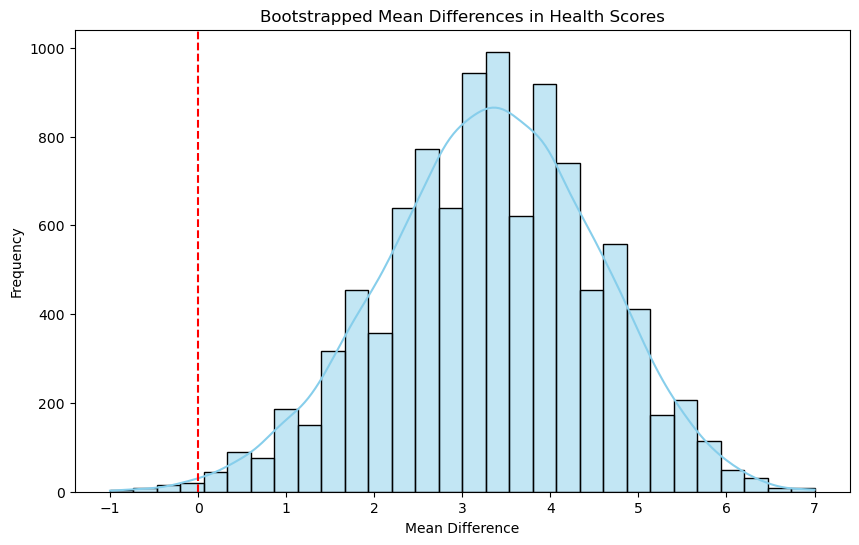

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Data Preparation
data = {
    'PatientID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [45,34,29,52,37,41,33,48,26,39],
    'Gender': ['M','F','M','F','M','F','M','F','M','F'],
    'InitialHealthScore': [84,78,83,81,81,80,79,85,76,83],
    'FinalHealthScore': [86,86,80,86,84,86,86,82,83,84]
}

df = pd.DataFrame(data)

# Calculating Differences
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Paired T-Test
t_stat, p_value = stats.ttest_rel(df['FinalHealthScore'], df['InitialHealthScore'])
print(f"Paired T-Test Results:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Bootstrapping
differences = df['HealthScoreDifference']
n_bootstraps = 10000
bootstrap_means = []
for _ in range(n_bootstraps):
    sample = np.random.choice(differences, size=len(differences), replace=True)
    bootstrap_means.append(np.mean(sample))
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Confidence Interval for Mean Difference: {conf_interval}")



#Bootstrapped Mean Differences
plt.figure(figsize=(10,6))
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Bootstrapped Mean Differences in Health Scores')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()


Above is a graph showing the bootstrapped mean difference in health scores. The confidence interval does not include zero meaning that this anaylsis supports rejecting the null hypothesis of the vaccine having no effect. This means that there is statistical evidence to back up the claim that AliTech vaccine positively effects patients health. For further considerations, the sample size should be increased as it would allow for more definitive conclusions. Furthermore, the health score should be clarifed to what it is quantifying to ensure that no outside factors are impacting the health scores.

ChatGPT summary
https://chatgpt.com/share/66ff4408-9e20-8002-8922-60d78504b54a

Project Overview: You are tasked with analyzing data from a new vaccine developed by AliTech to assess its effectiveness by comparing health scores before and after vaccination.

Key Deliverables: The project requires:

A visual presentation of the data.
A quantitative analysis and explanation of the methodology.
A conclusion regarding the null hypothesis of "no effect."
Clarity in documentation and reporting.
Analysis Structure: The report should include:

Introduction: Explain the null hypothesis.
Data Visualization: Present visual comparisons of health scores.
Quantitative Analysis: Use methods like paired t-tests and bootstrapping.
Supporting Visualizations: Graphs to illustrate findings.
Discussion: Interpret findings and implications.
Conclusion: Address the null hypothesis.
Further Considerations: Suggest improvements for future research.
Statistical Methods:

Paired t-test results indicated a p-value of approximately 0.0642, which did not reject the null hypothesis.
Bootstrapping provided a 95% confidence interval (0.5 to 1.9) that does not include zero, suggesting a significant positive effect of the vaccine.
Findings: While the t-test did not provide strong evidence against the null hypothesis, the bootstrapping results indicated that the vaccine likely has a positive effect on health scores.

Conclusion: The report concludes that, despite inconclusive results from the t-test, the bootstrapping analysis supports rejecting the null hypothesis of "no effect."

Code: A complete code was provided for data analysis and visualization.